In [1]:
#importing all the Librarires required

In [2]:
!pip3 install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re

In [3]:
#installing wordcloud

In [4]:
!pip3 install wordcloud

In [5]:
#nltk – Natural Language Toolkit is a collection of libraries for natural language processing
#stopwords – a collection of words that don’t provide any meaning to a sentence
#WordNetLemmatizer – used to convert different forms of words into a single item but still keeping the

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shourya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shourya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Shourya\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [7]:
#Scikit-Learn (Machine Learning Library for Python)
#CountVectorizer – transform text to vectors
#RandomizedSearchCV – for hyperparameter tuning
#RandomForestClassifier – machine learning algorithm for classification
#Accuracy Score – no. of correctly classified instances/total no. of instances
#Precision Score – the ratio of correctly predicted instances over total positive instances
#Recall Score – the ratio of correctly predicted instances over total instances in that class
#Roc Curve – a plot of true positive rate against false positive rate
#Classification Report – report of precision, recall and f1 score
#Confusion Matrix – a table used to describe the classification models

In [8]:
!pip install -U scikit-learn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, classification_report

In [9]:
#emotion Dataset includes train.txt,test.txt,val.txt

In [10]:
df_train = pd.read_csv("train.txt",delimiter=';',names=['text','label'])
df_val = pd.read_csv("val.txt",delimiter=';',names=['text','label'])

In [11]:
df = pd.concat([df_train,df_val])
df.reset_index(inplace=True,drop=True)

In [12]:
#Now, we will create a custom encoder to convert categorical target labels to numerical form, i.e. (0 and 1)

In [13]:
def custom_encoder(df):
    df.replace(to_replace ="surprise", value =1, inplace=True)
    df.replace(to_replace ="love", value =1, inplace=True)
    df.replace(to_replace ="joy", value =1, inplace=True)
    df.replace(to_replace ="fear", value =0, inplace=True)
    df.replace(to_replace ="anger", value =0, inplace=True)
    df.replace(to_replace ="sadness", value =0, inplace=True)
custom_encoder(df['label'])

In [14]:
#Data Pre-Processing

In [15]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [16]:
corpus = text_transformation(df['text'])

In [17]:
#Bag Of Words(BOW)

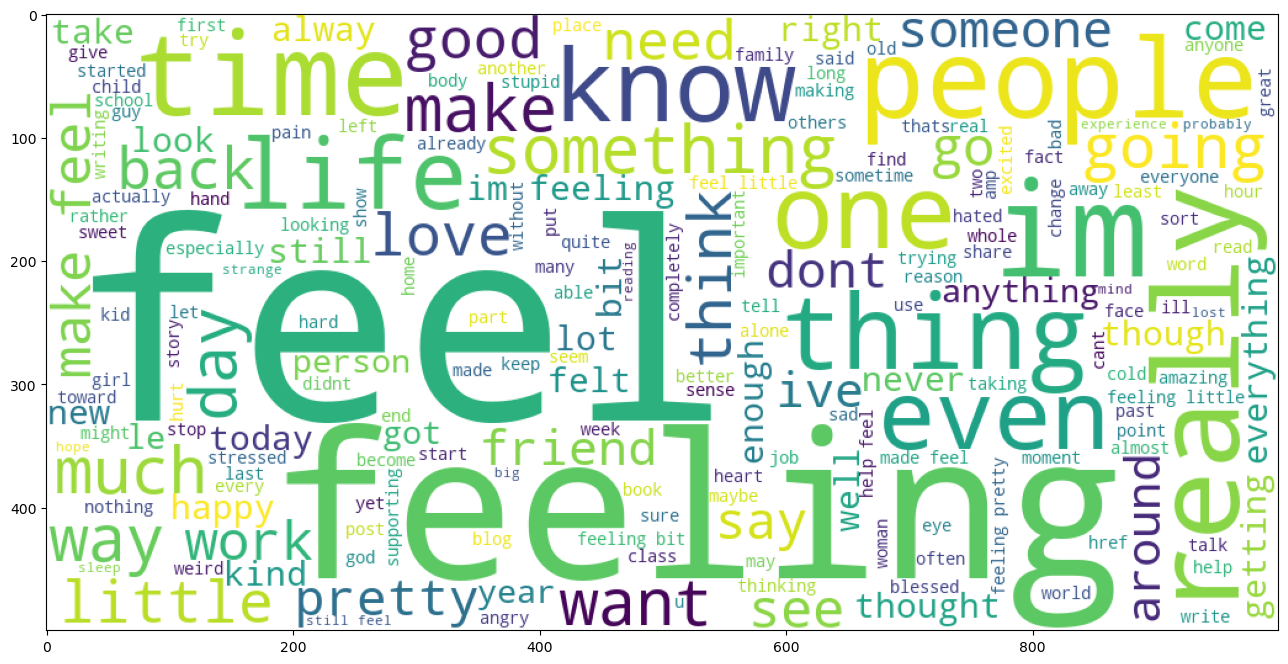

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

In [19]:
#Estimator or model – RandomForestClassifier in our case
#parameters – dictionary of hyperparameter names and their values
#cv – signifies cross-validation folds
#return_train_score – returns the training scores of the various models
# n_jobs – no. of jobs to run parallelly (“-1” signifies that all CPU cores will be used which reduces the training time drastically)
#First, We will create a dictionary, “parameters” which will contain the values of different hyperparameters.
#We will pass this as a parameter to RandomSearchCV to train our random forest classifier model using all possible 
#combinations of these parameters to find the best model.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df.label

In [21]:
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [50, 10, 15],
             'max_depth': [2, 5, None],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 5, 10],
             'bootstrap': [True, False]}

In [22]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(RandomForestClassifier(),parameters,n_iter=10,cv=5,return_train_score=True,n_jobs=-1)
rf_RandomGrid.fit(X,y)
rf_RandomGrid.best_params_

{'n_estimators': 15,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [23]:
#And then, we can view all the models and their respective parameters,
#mean test score and rank as  GridSearchCV stores all the results in the cv_results_ attribute.

In [24]:
for i in range(10):
    print('Parameters: ',rf_RandomGrid.cv_results_['params'][i])
    print('Mean Test Score: ',rf_RandomGrid.cv_results_['mean_test_score'][i])
    print('Rank: ',rf_RandomGrid.cv_results_['rank_test_score'][i])

Parameters:  {'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}
Mean Test Score:  0.9354444444444443
Rank:  3
Parameters:  {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}
Mean Test Score:  0.8012777777777778
Rank:  4
Parameters:  {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 2, 'bootstrap': False}
Mean Test Score:  0.5443888888888889
Rank:  9
Parameters:  {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': False}
Mean Test Score:  0.5451111111111111
Rank:  6
Parameters:  {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': False}
Mean Test Score:  0.5449999999999999
Rank:  7
Parameters:  {'n_estimators': 15, 'min_samples_split': 2,

In [25]:
#Now, we will choose the best parameters obtained from GridSearchCV and create a final random forest classifier model and then train our new model.

In [26]:
rfc = RandomForestClassifier(max_features=rf_RandomGrid.best_params_['max_features'],
                                      max_depth=rf_RandomGrid.best_params_['max_depth'],
                                      n_estimators=rf_RandomGrid.best_params_['n_estimators'],
                                      min_samples_split=rf_RandomGrid.best_params_['min_samples_split'],
                                      min_samples_leaf=rf_RandomGrid.best_params_['min_samples_leaf'],
                                      bootstrap=rf_RandomGrid.best_params_['bootstrap'])
rfc.fit(X,y)

RandomForestClassifier(min_samples_split=10, n_estimators=15)

In [27]:
#Test Data Transformation

In [28]:
test_df = pd.read_csv('test.txt',delimiter=';',names=['text','label'])
X_test,y_test = test_df.text,test_df.label
#encode the labels into two classes , 0 and 1
test_df = custom_encoder(y_test)
#pre-processing of text
test_corpus = text_transformation(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)
#predict the target
predictions = rfc.predict(testdata)

In [29]:
rcParams['figure.figsize'] = 10,5
cm=ConfusionMatrixDisplay.__init__(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)

Accuracy_score:  0.9475
Precision_score:  0.957351290684624
Recall_score:  0.9271739130434783
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1080
           1       0.96      0.93      0.94       920

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [30]:
#Model Evaluation

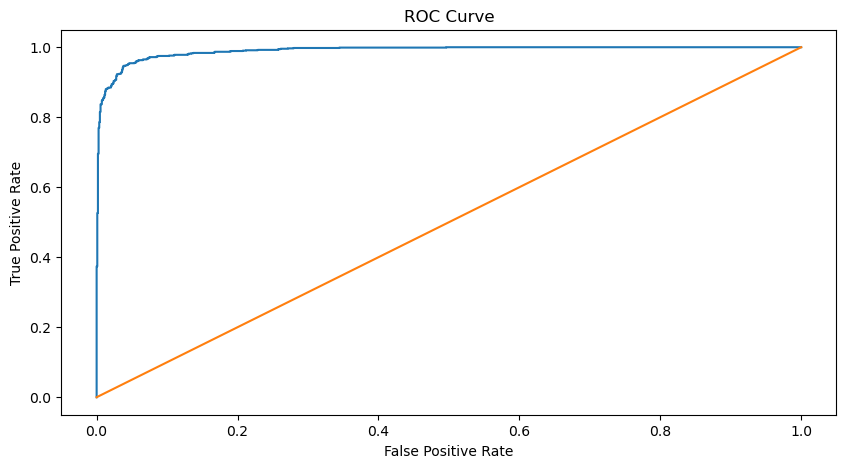

In [31]:
predictions_probability = rfc.predict_proba(testdata)
fpr,tpr,thresholds = roc_curve(y_test,predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [32]:
#Model Prediction

In [33]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")
# function to take the input statement and perform the same transformations we did earlier
def sentiment_predictor(input):
    input = text_transformation(input)
    transformed_input = cv.transform(input)
    prediction = rfc.predict(transformed_input)
    expression_check(prediction)
input1 = ["i feel more virtuous than when i eat veggies dipped in hummus."]
input2 = ["I bought a new phone and it's so bad."]
sentiment_predictor(input1)
sentiment_predictor(input2)

Input statement has Positive Sentiment.
Input statement has Negative Sentiment.
